# ANIMAL PREDICTION MODEL
## FROM KAGGLE COMPETTITON

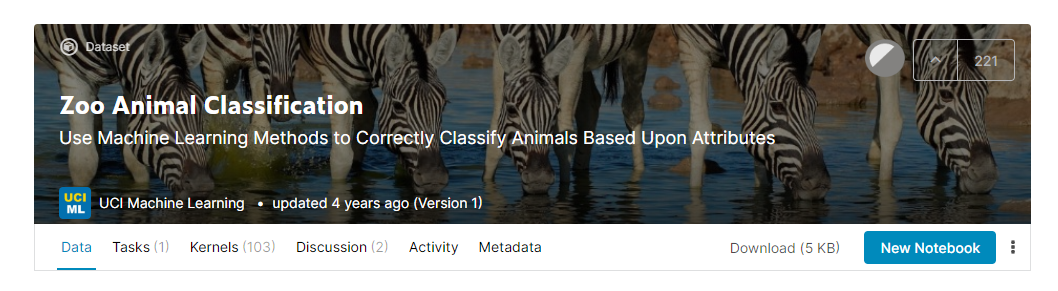

### Goal: classifying the animals based upon the variables given
### link: https://www.kaggle.com/uciml/zoo-animal-classification

### SAVED MODEL USED IN THE ANIMALPRE WEBAPP


In [23]:
#IMPORT LIBRARIES

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn import preprocessing, neighbors,model_selection
from sklearn.linear_model import LogisticRegression


#READ DATASET
df=pd.read_csv("zoo.csv")

#View first five lines of datset
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### DATA PREPROCESSING

In [39]:
#More info about dataset

#Datatypes
print (df.dtypes)

#check if any column is null

if df.isnull().values.any()== False:
    print("There are no null values in the dataset")
    
else:
    print (" There are null values in the dataset")
  

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object
There are no null values in the dataset


#### FROM OUTPUT ABOVE:
#### 1. There are no Null data
#### 2. Animal name column is an object , while other columns are integers
#### 3. Since we do not need animal name for training ,no need to vectorise or one hot encode, because it is drop when defining parameters for training

### PARAMETERS FOR TRAINING 

In [48]:
#PARAMETERS FOR TRAINING TRAINING

#Drop features columns not needed for training

df4= df.drop(["catsize","class_type","animal_name"], axis = 1 )
df4.head(5)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [26]:

#FEATURES
X=df4

#PRINT FEATURES SHAPE
print ("features shape:" ,X.shape)

#Labels
y=df['class_type']


#PRINT LABEL SHAPE
print ("label shape:", y.shape)





features shape: (101, 15)
label shape: (101,)


### TRAINING OF MODEL USING LOGISTIC REGRESSION 

In [17]:

#TRAINING OR FITTING MODEL USING LOGISTIC REGRESION



#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) 

#CHOOSE A CLASIFIER ALGORITHM

clasifier =LogisticRegression(C=1000)

#use algorithm to train
clasifier.fit(X_train,y_train)

#test algorithm on test and train data
accuracy = clasifier.score(X_train, y_train)
print("Original accuracy   on train data",accuracy )

accuracy = clasifier.score(X_test, y_test)
print("Original accuracy on test data",accuracy )


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Original accuracy   on train data 1.0
Original accuracy on test data 0.9047619047619048


### USING CONFUSION MATRIX TO EVALUATE TRAINED MODEL

[[9 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 3]]


[Text(0, 0.5, 'Mammal'),
 Text(0, 1.5, 'Bird'),
 Text(0, 2.5, 'Reptile'),
 Text(0, 3.5, 'Fish'),
 Text(0, 4.5, 'Amphibian'),
 Text(0, 5.5, 'Bug'),
 Text(0, 6.5, 'invertebrate')]

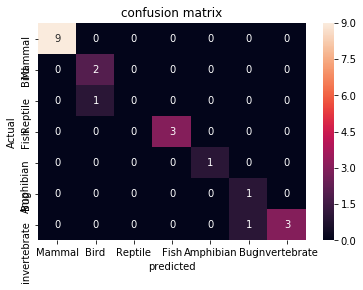

In [18]:
#showing the confusion matrix of prediction
from sklearn.metrics import confusion_matrix

prediction2 = clasifier.predict(X_test)
cm=confusion_matrix(y_test, prediction2)
print (cm)

ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);



ax.set_xlabel("predicted"), ax.set_ylabel("Actual");
ax.set_title("confusion matrix");
ax.xaxis.set_ticklabels(['Mammal','Bird','Reptile','Fish','Amphibian','Bug','invertebrate']); ax.yaxis.set_ticklabels(['Mammal','Bird','Reptile','Fish','Amphibian','Bug','invertebrate'])

### SAVE MODEL WITH PICKLE

In [19]:
#To pickle the ml model
import pickle
from sklearn.externals import joblib

filename= 'animalpre_model.pkl'

joblib.dump(clasifier, filename)


['animalpre_model.pkl']

### USING SAVED MODEL FOR PREDICTION ON THE DATASET

In [58]:
#PREDICTION

#Scale data into ones and zeros for prediction

from sklearn.preprocessing import MinMaxScaler


sc=MinMaxScaler()

#Load saved model
mdl=joblib.load('animalpre_model.pkl')

#Predict on trained data
X_test=sc.fit_transform(X)
y_pred=mdl.predict(X_test)

print ("target variables are",y_pred)

#store in a dataset and compare with orignal trained dataset
#We see it predicted the target values accurately

val=pd.DataFrame(y_pred, columns=['class_type'])


#Replace numbers with target animal
val= val.replace({1:'Mammal', 2:'Bird',3:'reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'})
val



target variables are [1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 7 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 7 7 2 7 2 1 1 7 1 1 1 1 7 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 3 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 7 5 2 3 4 1 1 2 1 6 1 7 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,class_type
0,Mammal
1,Mammal
2,Fish
3,Mammal
4,Mammal
5,Mammal
6,Mammal
7,Fish
8,Fish
9,Mammal
